# 04-Spam-Classifier

It's time to make our first real Machine Learning application of NLP: a spam classifier!

A spam classifier is a Machine Learning model that classifier texts (email or SMS) into two categories: Spam (1) or legitimate (0).

To do that, we will reuse our knowledge: we will apply preprocessing and BOW (Bag Of Words) on a dataset of texts.
Then we will use a classifier to predict to which class belong a new email/SMS, based on the BOW.

First things first: import the needed libraries.

In [1]:
# Import NLTK and all the needed libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

Load now the dataset in *spam.csv* using pandas. Use the 'latin-1' encoding as loading option.

In [2]:
# TODO: Load the dataset 
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As usual, I suggest you to explore a bit this dataset.

In [3]:
# TODO: explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
class_counts = df['Class'].value_counts()
print(class_counts)

ham     4825
spam     747
Name: Class, dtype: int64


So as you see we have a column containing the labels, and a column containing the text to classify.

We will begin by doing the usual preprocessing: tokenization, punctuation removal and lemmatization.

In [17]:
# TODO: Perform preprocessing over all the text
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

word_net_lemmatize = WordNetLemmatizer()

def lemmatize_word(message):
    return [word_net_lemmatize.lemmatize(word) for word in message]

df["Message"] = df["Message"].str.replace('[^a-zA-Z0-9 ]', '')
df["tokens"] = df["Message"].apply(word_tokenize)
df["tokens"] = df["tokens"].apply(lemmatize_word)

df["tokens"]

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, dont, think, he, go, to, usf, he, lif...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568            [Will, b, going, to, esplanade, fr, home]
5569    [Pity, wa, in, mood, for, that, Soany, other, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                      [Rofl, Its, true, to, it, name]
Name: tokens, Length: 5572, dtype: object

Ok now we have our preprocessed data. Next step is to do a BOW.

In [7]:
# TODO: compute the BOW
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words="english")
BOW = count_vec.fit_transform(df["Message"]).toarray()
BOW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Then make a new dataframe as usual to have a visual idea of the words used and their frequencies.

In [8]:
# TODO: Make a new dataframe with the BOW
BOW_df = pd.DataFrame(data=BOW, columns=count_vec.get_feature_names())
BOW_df.head()

c:\Users\61406\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's check what is the most used word in the spam category and the non spam category.

There are two steps: first add the class to the BOW dataframe. Second, filter on a class, sum all the values and print the most frequent one.

In [9]:
# TODO: print the most used word in the spam and non spam category
temp_df = BOW_df.copy()
temp_df["Class"] = df["Class"]
most_frequ_word = temp_df[temp_df["Class"] == "spam"].drop(columns="Class").sum().idxmax()
most_frequ_word_non = temp_df[temp_df["Class"] == "ham"].drop(columns="Class").sum().idxmax()

print("Most frequent word in spam:", most_frequ_word)
print("Most frequent word in non-spam:", most_frequ_word_non)


Most frequent word in spam: free
Most frequent word in non-spam: im


You should find that the most frequent spam word is 'free', not so surprising, right?

Now we can make a classifier based on our BOW. We will use a simple logistic regression here for the example.

You're an expert, you know what to do, right? Split the data, train your model, predict and see the performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [11]:

# TODO: Perform a classification to predict whether a message is a spam or not
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df["Class"])
print(label_encoder.transform(df["Class"]))

alpha = 0.2
X_train, X_test, y_train, y_test = train_test_split(BOW_df, label_encoder.transform(df["Class"]), test_size = alpha)


[0 0 1 ... 0 0 0]


In [18]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)
test_pred = LR_classifier.predict(X_test)

accuracy_score(y_test, test_pred)

0.9802690582959641

Text(50.72222222222221, 0.5, 'True Label')

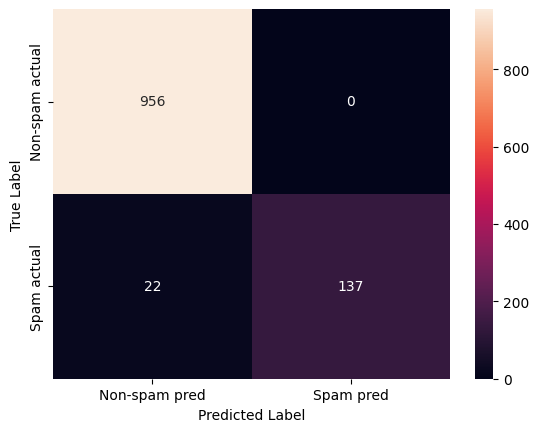

In [20]:
conf_matrix = confusion_matrix(y_test, test_pred)
ax=sns.heatmap(conf_matrix, annot=True, fmt="g", xticklabels=["Non-spam pred", "Spam pred"], yticklabels=["Non-spam actual", "Spam actual"])
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

What precision do you get? Check by hand on some samples where it did predict well to check what could go wrong...

Try to use other models and try to improve your results.

0.9495176127439982
0.9309417040358744


Text(50.72222222222221, 0.5, 'True Label')

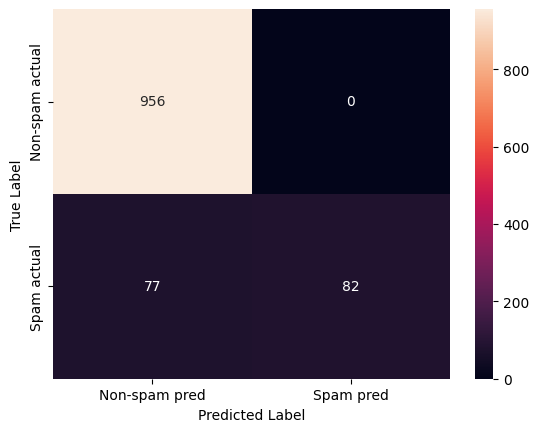

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k=3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train, y_train)
print(kNN.score(X_train, y_train))
print(kNN.score(X_test, y_test))

kNN_pred = kNN.predict(X_test)

conf_matrix = confusion_matrix(y_test, kNN_pred)
ax=sns.heatmap(conf_matrix, annot=True, fmt="g", xticklabels=["Non-spam pred", "Spam pred"], yticklabels=["Non-spam actual", "Spam actual"])
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

1.0
0.9811659192825112


Text(50.72222222222221, 0.5, 'True Label')

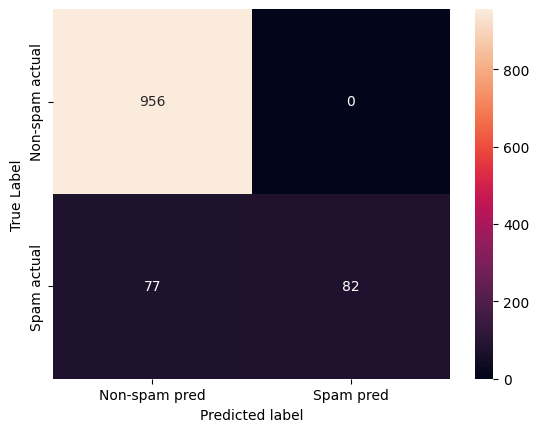

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))
svm_pred = svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, kNN_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="g", xticklabels=["Non-spam pred", "Spam pred"], yticklabels=["Non-spam actual", "Spam actual"])
ax.set_xlabel("Predicted label")
ax.set_ylabel("True Label")

0.9454790217635181
0.8878923766816144


Text(50.72222222222221, 0.5, 'True label')

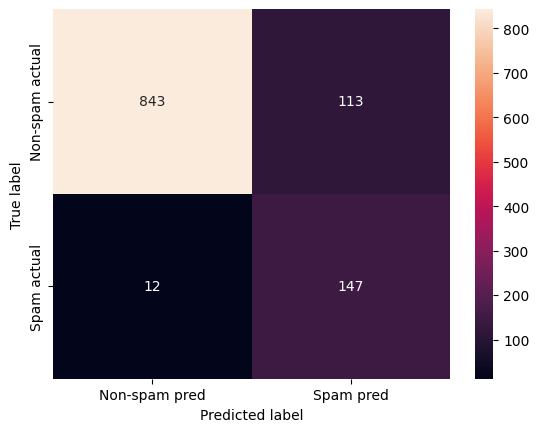

In [23]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

print(bayes.score(X_train, y_train))
print(bayes.score(X_test, y_test))

conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt="g", xticklabels=["Non-spam pred", "Spam pred"], yticklabels=["Non-spam actual", "Spam actual"])
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")